<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Kaggle_SteelDefect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle competition - Severstal: Steel Defect Detection
[Severstal: Steel Defect Detection](https://www.kaggle.com/c/severstal-steel-defect-detection/overview)

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras

In [138]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


#### Load the dataset from Kaggle

In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import pathlib

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

In [0]:
from collections import defaultdict

In [8]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [9]:
!ls

kaggle.json  sample_data


In [0]:
!mkdir ~/.kaggle

In [0]:
# copy "kaggle.json" from "/content/kaggle.json" to "~/.kaggle/kaggle.json"
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
# Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
# Install Kaggle library
!pip install -q kaggle

     |████████████████████████████████| 122kB 4.6MB/s 
ERROR: tensor2tensor 1.14.1 has requirement tensorflow-probability==0.7.0, but you'll have tensorflow-probability 0.9.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.14.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


Since there's a warning when run the below code block: "Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4) so we should run these code refer to The API is now working for downloads! first:

In [14]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
#Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 4.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=a6116f3dc52c4239e5045add407130940149a683219a46b217388d7b71cc537c
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [0]:
# Set environment variables for using the Kaggle API.
os.environ["KAGGLE_USERNAME"] = 
os.environ["KAGGLE_KEY"] = 

* Get the data

In [16]:
!kaggle competitions download -c severstal-steel-defect-detection

100% 1.56G/1.57G [00:19<00:00, 85.5MB/s]
100% 1.57G/1.57G [00:19<00:00, 84.3MB/s]


* Unzip train and test datasets

In [0]:
from zipfile import ZipFile

In [0]:
# This will extract all the files in stage1_test to current directory(/content)
with ZipFile("severstal-steel-defect-detection.zip", 'r') as zipObj:
# Extract all the contents of zip file in a folder "input"
    zipObj.extractall('/content/input')

#### read all text data

In [0]:
train_df = pd.read_csv("input/train.csv")
sample_df = pd.read_csv("input/sample_submission.csv")

In [20]:
train_df.shape

(7095, 3)

In [21]:
train_df.head(10)

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...
5  0025bde0c.jpg        3  8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...
6  0025bde0c.jpg        4  315139 8 315395 15 315651 16 315906 17 316162 ...
7  002af848d.jpg        4  290800 6 291055 13 291311 15 291566 18 291822 ...
8  002fc4e19.jpg        1  146021 3 146275 10 146529 40 146783 46 147038 ...
9  002fc4e19.jpg        2  145658 7 145901 20 146144 33 146386 47 146629 ...

In [24]:
sample_df.head()

ImageId EncodedPixels  ClassId
0  0000f269f.jpg      1 409600        0
1  000ccc2ac.jpg      1 409600        0
2  002451917.jpg      1 409600        0
3  003c5da97.jpg      1 409600        0
4  0042e163f.jpg      1 409600        0

First, check the number of each class

In [25]:
train_df.ClassId.value_counts()

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

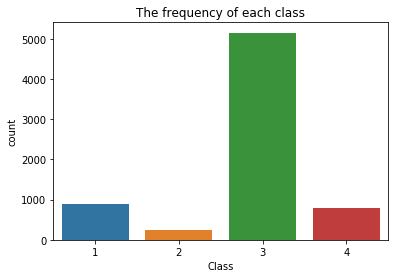

In [26]:
fig, ax = plt.subplots()
ax = sns.countplot(x="ClassId", data=train_df) # sns.countplot(train_df.ClassId)
ax.set_title('The frequency of each class')
ax.set_xlabel('Class');

In [28]:
!pwd

/content


In [0]:
train_images_dir = '/content/input/train_images'
test_images_dir = '/content/input/test_images'

In [0]:
train_images_names = sorted([i for i in os.listdir(train_images_dir) if os.path.isfile(os.path.join(train_images_dir, i))])
test_images_names = sorted([i for i in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, i))])

In [0]:
print("Total number of training images: ", len(os.listdir(train_images_dir)))
print("Total number of test images: ", len(os.listdir(test_images_dir)))

Total number of training images:  12568
Total number of test images:  5506


In [0]:
train_images_names

In [0]:
train_images = [os.path.join(train_images_dir, fname) for fname in train_images_names]
test_images = [os.path.join(test_images_dir, fname) for fname in test_images_names]

In [33]:
# Part of the steels are classified more the one type of defect
train_df.ImageId.value_counts()

db4867ee8.jpg    3
ef24da2ba.jpg    3
eeffa4c49.jpg    2
69f290a7f.jpg    2
6b513db3b.jpg    2
                ..
5dd5484fc.jpg    1
ea8acd661.jpg    1
b4124fe84.jpg    1
39ae1a183.jpg    1
235ba1dd3.jpg    1
Name: ImageId, Length: 6666, dtype: int64

The names in train_images_names but not in train_df are the images that are not defect

In [0]:
#cols = [col for col in df.columns if col not in ['B', 'D']]
#df[df.columns[~df.columns.isin(['C','D'])]]
# sum(train_df.ImageId.isin(train_images_names))

In [0]:
# Extract the non defect images
defect_names = [x for x in train_images_names if x in train_df.ImageId.tolist()]
non_defect_names = [x for x in train_images_names if x not in train_df.ImageId.tolist()]

In [32]:
print("The number of non defect images: ", len(non_defect_names))
print("The number of defect images: ", len(defect_names))

The number of defect images:  6666
The number of non defect images:  5902


In [97]:
len(list(set(defect_names)))

6666

In [0]:
# Split the train images into defect and non-defect
defect_images = [os.path.join(train_images_dir, fname) for fname in defect_names]
non_defect_images = [os.path.join(train_images_dir, fname) for fname in non_defect_names]

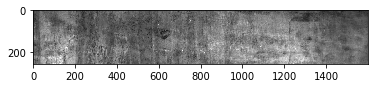

In [40]:
img = mpimg.imread(non_defect_images[50])
plt.imshow(img)

#### check image data

In [0]:
ROWS = 5
COLUMNS = 2

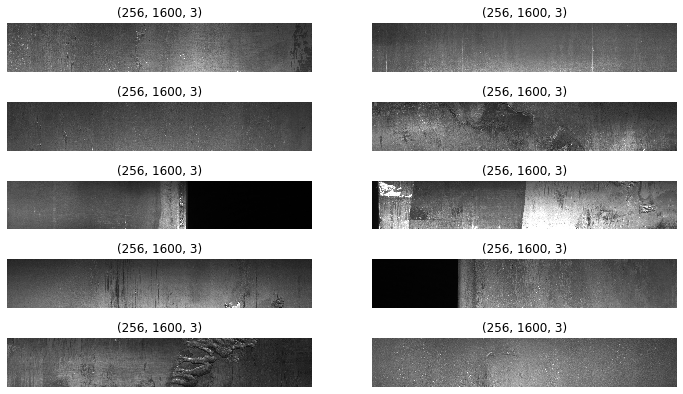

In [48]:
# Check the defect images
fig, axes = plt.subplots(ROWS, COLUMNS, figsize=(12,7))
for i, img_path in enumerate(defect_images[:10]):
  img = mpimg.imread(img_path)
  img_shape = img.shape

  x = i//COLUMNS
  y = i%COLUMNS
  axes[x, y].imshow(img)
  axes[x, y].axis('off')
  axes[x, y].set_title(img.shape)

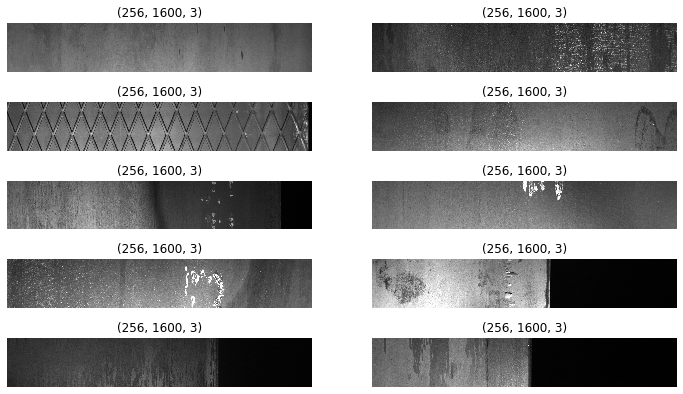

In [49]:
# Check the non-defect images
fig, axes = plt.subplots(ROWS, COLUMNS, figsize=(12,7))
for i, img_path in enumerate(non_defect_images[:10]):
  img = mpimg.imread(img_path)
  img_shape = img.shape

  x = i//COLUMNS
  y = i%COLUMNS
  axes[x, y].imshow(img)
  axes[x, y].axis('off')
  axes[x, y].set_title(img.shape)

In [0]:
# check the size of all training images
train_size_dict = defaultdict(int)
for i in train_images:
  train_shape = mpimg.imread(i).shape
  train_size_dict[train_shape] += 1

In [51]:
train_size_dict

defaultdict(int, {(256, 1600, 3): 12568})

In [0]:
# check the size of all test images
test_size_dict = defaultdict(int)
for i in test_images:
  test_shape = mpimg.imread(i).shape
  test_size_dict[test_shape] += 1

In [53]:
test_size_dict

defaultdict(int, {(256, 1600, 3): 5506})

#### Visualizs thd masks

In [0]:
palette = [(255, 89, 143), (0, 179, 44), (255, 215, 0), (21,178,211)]

In [0]:
def make_mask(img_name, defect_class):
  #img_name = train_df.ImageId[idx]
  #defect_class = train_df[train_df.ImageId.isin([img_name])].ClassId
  mask = np.zeros((256, 1600, len(defect_class)), dtype=np.uint8)

  for i in range(len(defect_class)):
    label = train_df[train_df.ImageId.isin([img_name])].iloc[i].EncodedPixels.split(" ")
    label_pos = map(int, label[0::2])
    label_len = map(int, label[1::2])

    mask_label = np.zeros(256*1600, dtype=np.uint8)
    for pos, leng in zip(label_pos, label_len):
      mask_label[pos-1:pos+leng-1] = 1
    mask[:, :, i] = mask_label.reshape(256, 1600, order='F')
  
  return mask

In [0]:
def show_mask_image(img_name):
  defect_class = train_df[train_df.ImageId.isin([img_name])].ClassId
  mask = make_mask(img_name, defect_class)
  img = mpimg.imread(os.path.join(train_images_dir, img_name))

  fig, ax = plt.subplots(figsize=(15, 5))
  for i in range(len(defect_class)):
    contours, _ = cv2.findContours(mask[:,:,i], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for j in range(len(contours)):
      cv2.polylines(img, contours[j], True, palette[defect_class.iloc[i]-1], 2) #cv2.polylines(影像, 頂點座標, 封閉型, 顏色, 線條寬度)
  ax.set_title(img_name)
  ax.imshow(img)

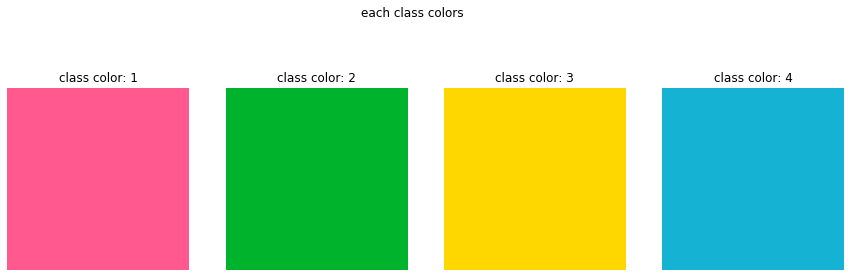

In [240]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palette[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")

plt.show()

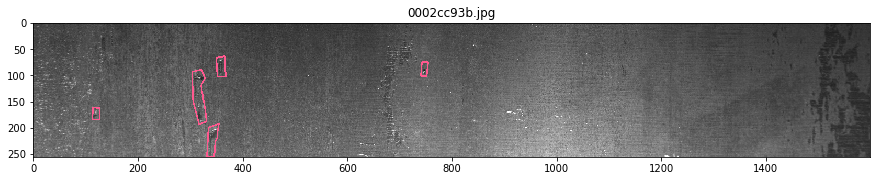

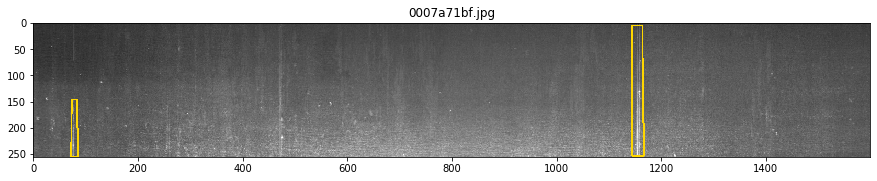

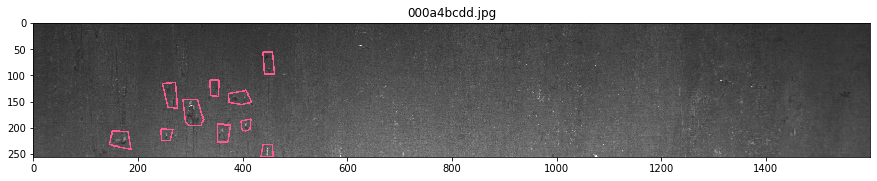

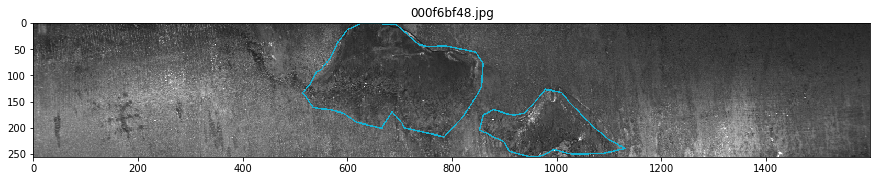

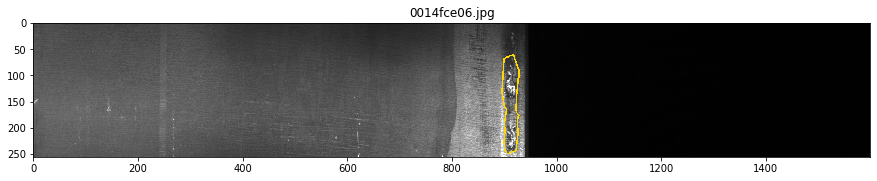

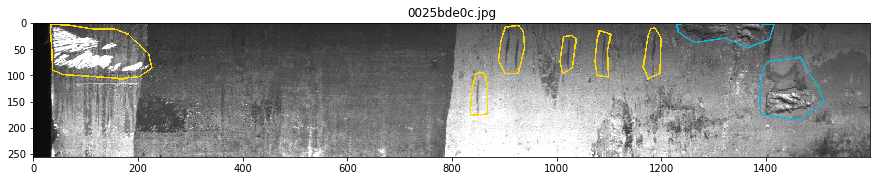

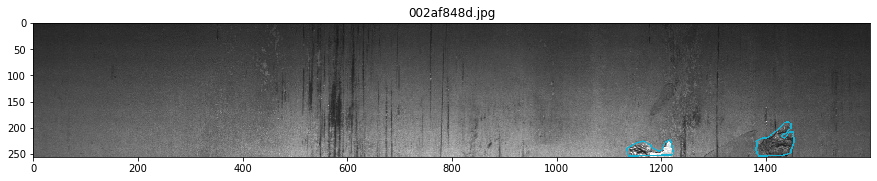

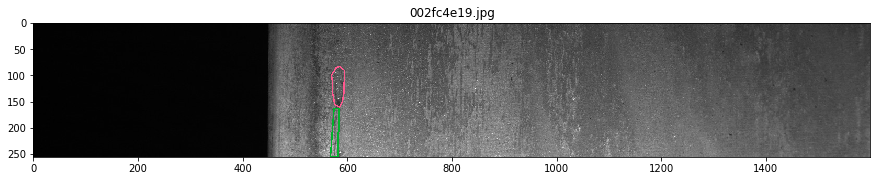

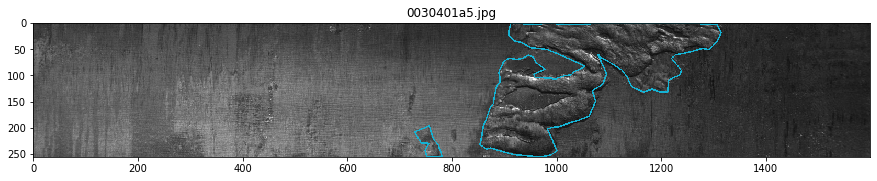

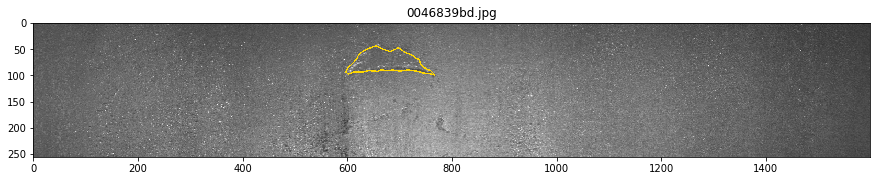

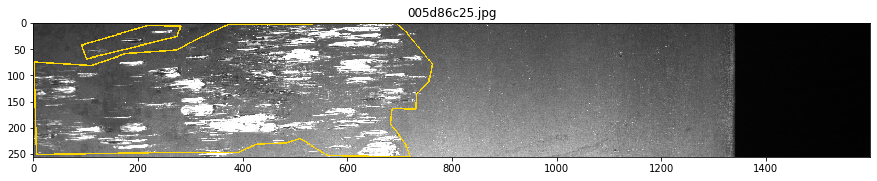

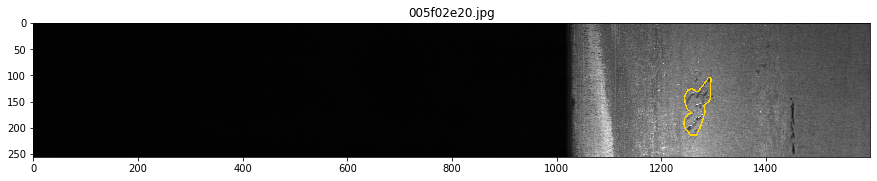

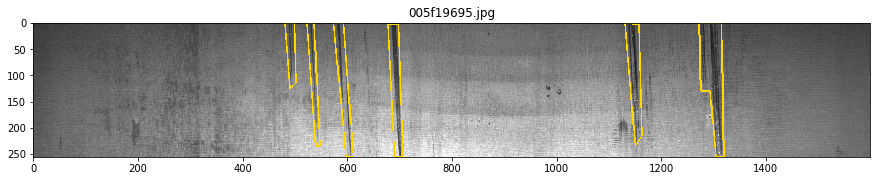

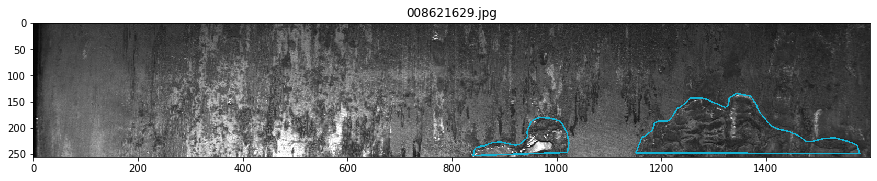

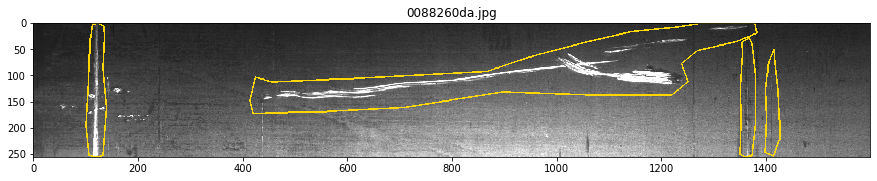

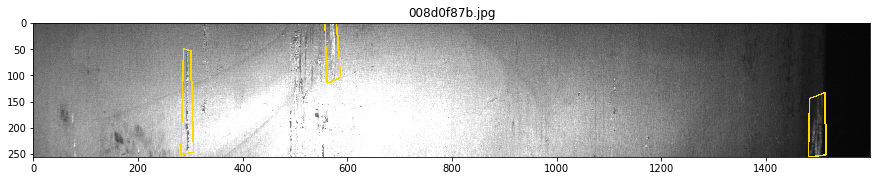

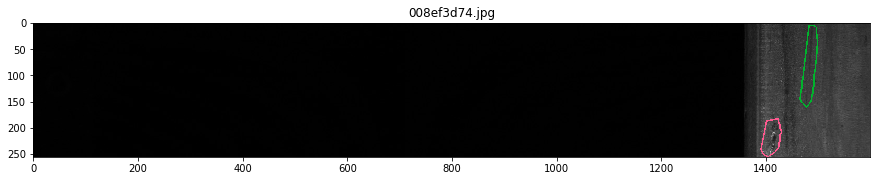

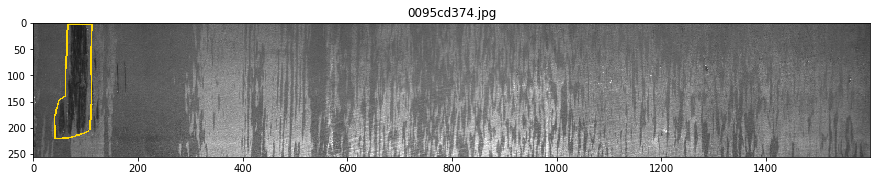

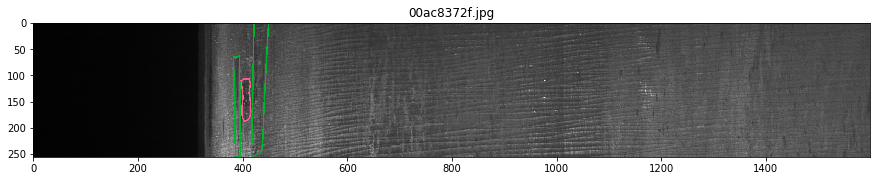

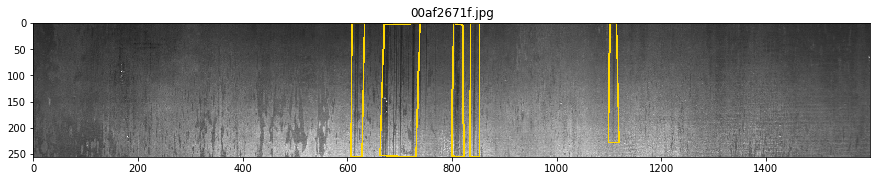

In [245]:
for fname in defect_names[:20]:
  show_mask_image(fname)